# Simple Data Transformation

This notebook demonstrates various techniques for transforming data in Python using pandas, NumPy, and other libraries. We'll cover simple transformations that are essential for data preprocessing and feature engineering.

## 1. Import Libraries and Setup

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

# Allow to display all columns
pd.set_option('display.max_columns', None)

### Create sample datasets for demonstration

In [2]:
# Create a simple dataset for demonstration purposes
np.random.seed(42)  # For reproducibility

# Create a basic dataframe with different data types
df = pd.DataFrame({
    'id': range(1, 11),
    'name': ['John Smith', 'Jane Doe', 'Bob Johnson', 'Maria Garcia', 'Wei Chen', 
             'Ahmed Ali', 'Sara Patel', 'Tom Wilson', 'Anna Kim', 'Luis Rodriguez'],
    'age': np.random.randint(18, 65, 10),
    'income': np.random.randint(30000, 120000, 10),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 10),
    'score': np.random.uniform(0, 100, 10).round(2),
    'registered': np.random.choice([True, False], 10),
    # 'join_date': pd.date_range(start='2020-01-01', periods=10, freq='M')
    'join_date': pd.date_range(start='2020-01-01', periods=10, freq='ME')
})

# Display the first few rows of the dataframe
print("Sample dataframe:")
df.head()

Sample dataframe:


,id,name,age,income,education,score,registered,join_date
0,1,John Smith,56,117498,Bachelor,0.71,False,2020-01-31
1,2,Jane Doe,46,74131,Bachelor,2.31,False,2020-02-29
2,3,Bob Johnson,32,90263,Bachelor,52.48,True,2020-03-31
3,4,Maria Garcia,60,46023,PhD,39.99,True,2020-04-30
4,5,Wei Chen,25,71090,PhD,4.67,True,2020-05-31


In [3]:
# Create another dataset with some missing values and outliers
df_messy = pd.DataFrame({
    'product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Keyboard', 'Mouse', 'Printer', 'Speaker', 'Headphones', 'Camera'],
    'price': [1200, 800, 500, 300, np.nan, 50, 150, 120, 80, 450],
    'stock': [10, 25, 15, np.nan, 30, 40, 5, np.nan, 20, 10],
    'rating': [4.5, 4.2, 3.8, 4.0, 3.5, 4.7, np.nan, 3.9, 4.1, 4.3],
    'category': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Accessories', 
                'Accessories', 'Electronics', 'Accessories', 'Accessories', 'Electronics'],
    'last_updated': pd.date_range(start='2023-01-01', periods=10, freq='3D')
})

print("Dataset with missing values:")
df_messy.head()

Dataset with missing values:


,product,price,stock,rating,category,last_updated
0,Laptop,1200.0,10.0,4.5,Electronics,2023-01-01
1,Phone,800.0,25.0,4.2,Electronics,2023-01-04
2,Tablet,500.0,15.0,3.8,Electronics,2023-01-07
3,Monitor,300.0,NaN,4.0,Electronics,2023-01-10
4,Keyboard,NaN,30.0,3.5,Accessories,2023-01-13


## 2. Basic Data Transformations

Let's start with some basic transformations like adding/removing columns, renaming columns, and changing data types.

In [4]:
# 1. Adding a new column based on existing ones
df['income_tier'] = pd.cut(df['income'], 
                          bins=[0, 40000, 80000, 120000], 
                          labels=['Low', 'Medium', 'High'])

# 2. Removing a column
df_reduced = df.drop('id', axis=1)

# 3. Renaming columns
df_renamed = df.rename(columns={'name': 'full_name', 'age': 'years'})

# 4. Changing data types
df['age'] = df['age'].astype(float)
df['score'] = df['score'].astype(int)

# 5. Create a copy of the dataframe for next examples
df_transformed = df.copy()

# Display the results
print("Dataframe with new income_tier column:")
print(df[['name', 'income', 'income_tier']].head())
print("\nDataframe with 'id' column removed:")
print(df_reduced.columns.tolist())
print("\nDataframe with renamed columns:")
print(df_renamed.columns.tolist())
print("\nDataframe with changed data types:")
print(df[['age', 'score']].dtypes)

Dataframe with new income_tier column:
           name  income income_tier
0    John Smith  117498        High
1      Jane Doe   74131      Medium
2   Bob Johnson   90263        High
3  Maria Garcia   46023      Medium
4      Wei Chen   71090      Medium

Dataframe with 'id' column removed:
['name', 'age', 'income', 'education', 'score', 'registered', 'join_date', 'income_tier']

Dataframe with renamed columns:
['id', 'full_name', 'years', 'income', 'education', 'score', 'registered', 'join_date', 'income_tier']

Dataframe with changed data types:
age      float64
score      int64
dtype: object


### Basic Arithmetic Operations on Columns

In [5]:
# Create a new column via arithmetic operation
df_transformed['income_after_tax'] = df_transformed['income'] * 0.7  # 30% tax

# Combine columns with different operations
df_transformed['score_weight'] = df_transformed['score'] * 0.2 + df_transformed['age'] * 0.1

# Apply conditional transformations
df_transformed['bonus'] = np.where(df_transformed['score'] > 70, 1000, 0)

# Display results
print("Dataframe with arithmetic operations:")
df_transformed[['name', 'income', 'income_after_tax', 'score', 'age', 'score_weight', 'bonus']].head()

Dataframe with arithmetic operations:


,name,income,income_after_tax,score,age,score_weight,bonus
0,John Smith,117498,82248.6,0,56.0,5.6,0
1,Jane Doe,74131,51891.7,2,46.0,5.0,0
2,Bob Johnson,90263,63184.1,52,32.0,13.6,0
3,Maria Garcia,46023,32216.1,39,60.0,13.8,0
4,Wei Chen,71090,49763.0,4,25.0,3.3,0


## 3. Mathematical Transformations

Mathematical transformations are useful for normalizing data distributions, feature engineering, and preparing data for machine learning models.

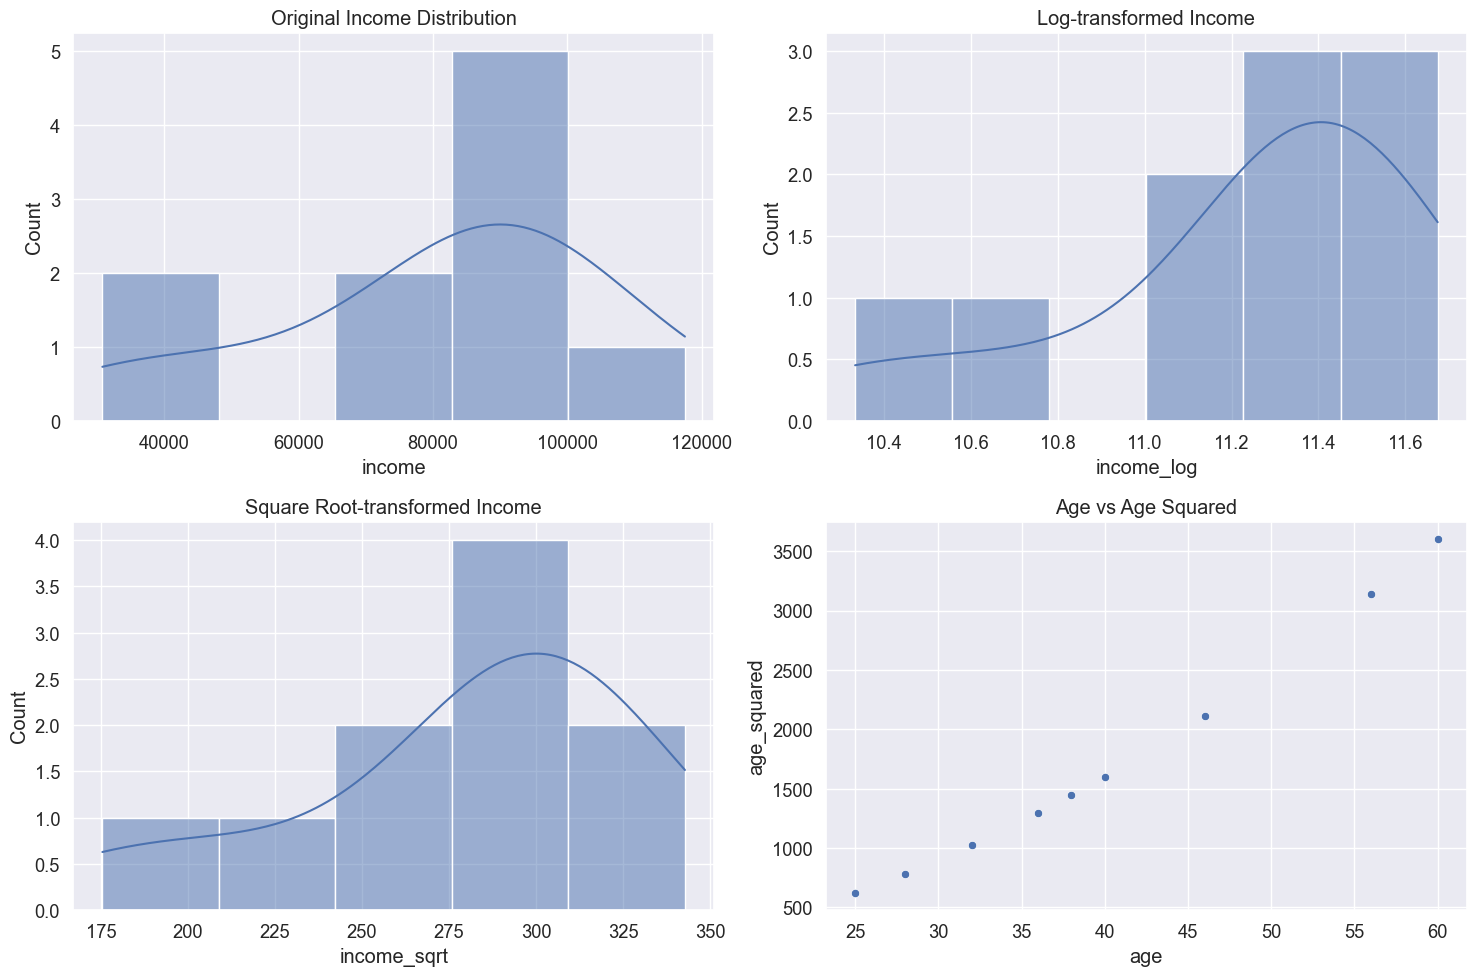

,income,income_log,income_sqrt,age,age_squared,score,score_exp
0,117498,11.674177,342.779813,56.0,3136.0,0,1.000000
1,74131,11.213589,272.270086,46.0,2116.0,2,1.040811
2,90263,11.410483,300.438014,32.0,1024.0,52,2.829217
3,46023,10.736897,214.529718,60.0,3600.0,39,2.181472
4,71090,11.171702,266.627080,25.0,625.0,4,1.083287


In [6]:
# Copy DataFrame for mathematical transformations
df_math = df.copy()

# Log transformation (useful for right-skewed data)
df_math['income_log'] = np.log(df_math['income'])

# Square root transformation (another way to handle right skew)
df_math['income_sqrt'] = np.sqrt(df_math['income'])

# Square transformation
df_math['age_squared'] = df_math['age'] ** 2

# Exponential transformation
df_math['score_exp'] = np.exp(df_math['score'] / 50)  # Scaled down to avoid overflow

# Trigonometric transformations (useful for cyclical data)
df_math['sine_age'] = np.sin(df_math['age'] * np.pi / 50)

# Visualization of transformations for income
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_math['income'], kde=True)
plt.title('Original Income Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df_math['income_log'], kde=True)
plt.title('Log-transformed Income')

plt.subplot(2, 2, 3)
sns.histplot(df_math['income_sqrt'], kde=True)
plt.title('Square Root-transformed Income')

plt.subplot(2, 2, 4)
sns.scatterplot(x='age', y='age_squared', data=df_math)
plt.title('Age vs Age Squared')

plt.tight_layout()
plt.show()

# Display results
df_math[['income', 'income_log', 'income_sqrt', 'age', 'age_squared', 'score', 'score_exp']].head()

### Polynomial Features Creation

In [7]:
# Creating polynomial features (useful for linear models to capture non-linear relationships)
df_math['age_squared'] = df_math['age'] ** 2
df_math['age_cubed'] = df_math['age'] ** 3

# Interaction terms
df_math['age_income_interaction'] = df_math['age'] * df_math['income'] / 10000  # Scaled for readability

# Display results
df_math[['age', 'income', 'age_squared', 'age_cubed', 'age_income_interaction']].head()

,age,income,age_squared,age_cubed,age_income_interaction
0,56.0,117498,3136.0,175616.0,657.9888
1,46.0,74131,2116.0,97336.0,341.0026
2,32.0,90263,1024.0,32768.0,288.8416
3,60.0,46023,3600.0,216000.0,276.1380
4,25.0,71090,625.0,15625.0,177.7250


## 4. String Transformations

String manipulation is essential for text cleaning, feature extraction, and preparing categorical data.

In [8]:
# Copy DataFrame for string transformations
df_str = df.copy()

# Convert strings to lowercase
df_str['name_lower'] = df_str['name'].str.lower()

# Split a string and extract first and last name
df_str[['first_name', 'last_name']] = df_str['name'].str.split(' ', expand=True)

# Replace specific content in strings
df_str['education_cleaned'] = df_str['education'].str.replace('School', 'Diploma')

# Extract specific patterns (e.g., extracting initials)
df_str['initials'] = df_str['first_name'].str[0] + df_str['last_name'].str[0]

# String concatenation
df_str['full_info'] = df_str['name'] + ' | ' + df_str['education'] + ' | Age: ' + df_str['age'].astype(str)

# String methods with apply and lambda
df_str['name_length'] = df_str['name'].apply(lambda x: len(x))

# Display results
df_str[['name', 'name_lower', 'first_name', 'last_name', 'initials', 'education', 
       'education_cleaned', 'full_info', 'name_length']].head()

,name,name_lower,first_name,last_name,initials,education,education_cleaned,full_info,name_length
0,John Smith,john smith,John,Smith,JS,Bachelor,Bachelor,John Smith | Bachelor | Age: 56.0,10
1,Jane Doe,jane doe,Jane,Doe,JD,Bachelor,Bachelor,Jane Doe | Bachelor | Age: 46.0,8
2,Bob Johnson,bob johnson,Bob,Johnson,BJ,Bachelor,Bachelor,Bob Johnson | Bachelor | Age: 32.0,11
3,Maria Garcia,maria garcia,Maria,Garcia,MG,PhD,PhD,Maria Garcia | PhD | Age: 60.0,12
4,Wei Chen,wei chen,Wei,Chen,WC,PhD,PhD,Wei Chen | PhD | Age: 25.0,8


In [9]:
# More advanced string operations

# Pattern extraction using regex
df_str['has_vowel_start'] = df_str['first_name'].str.match(r'^[aeiouAEIOU]')

# Count specific characters
df_str['vowel_count'] = df_str['name'].apply(lambda x: sum(1 for char in x.lower() if char in 'aeiou'))

# Padding strings
df_str['id_padded'] = df_str['id'].astype(str).str.zfill(3)

# Extract specific parts of strings (e.g., domain from email)
sample_emails = pd.Series(['john.smith@example.com', 'jane.doe@company.org', 'bob.johnson@test.net'])
domains = sample_emails.str.extract(r'@([^.]+)')

print("Pattern extraction examples:")
print(domains)

# Display results
df_str[['name', 'has_vowel_start', 'vowel_count', 'id', 'id_padded']].head()

Pattern extraction examples:
         0
0  example
1  company
2     test


,name,has_vowel_start,vowel_count,id,id_padded
0,John Smith,False,2,1,001
1,Jane Doe,False,4,2,002
2,Bob Johnson,False,3,3,003
3,Maria Garcia,False,6,4,004
4,Wei Chen,False,3,5,005


## 5. Categorical Data Transformations

Converting categorical variables into numerical representations is crucial for machine learning models.

In [10]:
# # Copy DataFrame for categorical transformations
# df_cat = df.copy()

# # One-hot encoding (good for nominal categories with no inherent order)
# education_dummies = pd.get_dummies(df_cat['education'], prefix='edu')
# df_cat = pd.concat([df_cat, education_dummies], axis=1)

# # Label encoding (good for ordinal categories)
# le = LabelEncoder()
# education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
# df_cat['education_encoded'] = df_cat['education'].map(education_mapping)

# # Binary encoding (for boolean values)
# df_cat['registered_int'] = df_cat['registered'].astype(int)

# # Ordinal encoding with custom mapping
# income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
# df_cat['income_tier_encoded'] = df_cat['income_tier'].map(income_mapping)

# # Display the transformations
# print("One-hot encoding for education:")
# print(df_cat[['education', 'edu_High School', 'edu_Bachelor', 'edu_Master', 'edu_PhD']].head())
# print("\nLabel encoding for education:")
# print(df_cat[['education', 'education_encoded']].head())
# print("\nBinary encoding for registered:")
# print(df_cat[['registered', 'registered_int']].head())
# print("\nOrdinal encoding for income tier:")
# print(df_cat[['income_tier', 'income_tier_encoded']].drop(df_cat[df_cat['income_tier'].isna()].index).head())

```
KeyError: "['edu_Master'] not in index"
```

In [11]:
# Copy DataFrame for categorical transformations
df_cat = df.copy()

# One-hot encoding (good for nominal categories with no inherent order)
education_dummies = pd.get_dummies(df_cat['education'], prefix='edu')
df_cat = pd.concat([df_cat, education_dummies], axis=1)

# Label encoding (good for ordinal categories)
le = LabelEncoder()
education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
df_cat['education_encoded'] = df_cat['education'].map(education_mapping)

# Binary encoding (for boolean values)
df_cat['registered_int'] = df_cat['registered'].astype(int)

# Ordinal encoding with custom mapping
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_cat['income_tier_encoded'] = df_cat['income_tier'].map(income_mapping)

# Check the actual column names after one-hot encoding
print("Columns after one-hot encoding:")
print(df_cat.columns)

# Display the transformations
print("One-hot encoding for education:")
# Safely reference the columns that exist
print(df_cat[['education'] + [col for col in df_cat.columns if col.startswith('edu_')]].head())
print("\nLabel encoding for education:")
print(df_cat[['education', 'education_encoded']].head())
print("\nBinary encoding for registered:")
print(df_cat[['registered', 'registered_int']].head())
print("\nOrdinal encoding for income tier:")
print(df_cat[['income_tier', 'income_tier_encoded']].drop(df_cat[df_cat['income_tier'].isna()].index).head())

Columns after one-hot encoding:
Index(['id', 'name', 'age', 'income', 'education', 'score', 'registered',
       'join_date', 'income_tier', 'edu_Bachelor', 'edu_High School',
       'edu_PhD', 'education_encoded', 'registered_int',
       'income_tier_encoded'],
      dtype='object')
One-hot encoding for education:
  education  edu_Bachelor  edu_High School  edu_PhD
0  Bachelor          True            False    False
1  Bachelor          True            False    False
2  Bachelor          True            False    False
3       PhD         False            False     True
4       PhD         False            False     True

Label encoding for education:
  education  education_encoded
0  Bachelor                  1
1  Bachelor                  1
2  Bachelor                  1
3       PhD                  3
4       PhD                  3

Binary encoding for registered:
   registered  registered_int
0       False               0
1       False               0
2        True               1


In [12]:
# Using scikit-learn for encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Reshape the data for sklearn transformers
education_array = df['education'].values.reshape(-1, 1)

# One-hot encoding using scikit-learn
onehot_encoder = OneHotEncoder(sparse_output=False)
education_onehot = onehot_encoder.fit_transform(education_array)
education_onehot_df = pd.DataFrame(
    education_onehot, 
    columns=[f'edu_sk_{cat}' for cat in onehot_encoder.categories_[0]],
    index=df.index
)

# Ordinal encoding using scikit-learn
ordinal_encoder = OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master', 'PhD']])
education_ordinal = ordinal_encoder.fit_transform(education_array)
education_ordinal_df = pd.DataFrame(education_ordinal, columns=['education_ordinal'], index=df.index)

# Display the scikit-learn transformations
print("Scikit-learn One-hot encoding:")
print(pd.concat([df['education'], education_onehot_df], axis=1).head())

print("\nScikit-learn Ordinal encoding:")
print(pd.concat([df['education'], education_ordinal_df], axis=1).head())

Scikit-learn One-hot encoding:
  education  edu_sk_Bachelor  edu_sk_High School  edu_sk_PhD
0  Bachelor              1.0                 0.0         0.0
1  Bachelor              1.0                 0.0         0.0
2  Bachelor              1.0                 0.0         0.0
3       PhD              0.0                 0.0         1.0
4       PhD              0.0                 0.0         1.0

Scikit-learn Ordinal encoding:
  education  education_ordinal
0  Bachelor                1.0
1  Bachelor                1.0
2  Bachelor                1.0
3       PhD                3.0
4       PhD                3.0


## 6. Custom Transformations with apply() and map()

Creating custom transformations using pandas .apply() and .map() functions allows for complex logic and conditional transformations.

In [13]:
# Copy DataFrame for custom transformations
df_custom = df.copy()

# Simple lambda function with apply
df_custom['age_category'] = df_custom['age'].apply(
    lambda x: 'Young' if x < 30 else ('Middle-aged' if x < 50 else 'Senior')
)

# Custom function with multiple conditions
def salary_bonus(row):
    if row['education'] == 'PhD' and row['age'] < 40:
        return row['income'] * 0.2
    elif row['education'] in ['Master', 'Bachelor'] and row['age'] < 35:
        return row['income'] * 0.15
    else:
        return row['income'] * 0.1

df_custom['bonus_amount'] = df_custom.apply(salary_bonus, axis=1)

# Using map with a dictionary
title_map = {
    'PhD': 'Dr.',
    'Master': 'MSc.',
    'Bachelor': 'BSc.',
    'High School': 'Mr./Ms.'
}
df_custom['title'] = df_custom['education'].map(title_map)

# Combining string operations with apply
df_custom['formal_name'] = df_custom.apply(
    lambda row: f"{row['title']} {row['name']}", 
    axis=1
)

# Display results
print("Custom transformations results:")
df_custom[['name', 'age', 'age_category', 'education', 'income', 
          'bonus_amount', 'title', 'formal_name']].head()

Custom transformations results:


,name,age,age_category,education,income,bonus_amount,title,formal_name
0,John Smith,56.0,Senior,Bachelor,117498,11749.80,BSc.,BSc. John Smith
1,Jane Doe,46.0,Middle-aged,Bachelor,74131,7413.10,BSc.,BSc. Jane Doe
2,Bob Johnson,32.0,Middle-aged,Bachelor,90263,13539.45,BSc.,BSc. Bob Johnson
3,Maria Garcia,60.0,Senior,PhD,46023,4602.30,Dr.,Dr. Maria Garcia
4,Wei Chen,25.0,Young,PhD,71090,14218.00,Dr.,Dr. Wei Chen


In [14]:
# More complex custom transformations

# Function that evaluates multiple columns
def calculate_score(row):
    base_score = row['score']
    
    # Age adjustment
    if row['age'] < 30:
        age_factor = 1.1
    elif row['age'] < 50:
        age_factor = 1.0
    else:
        age_factor = 0.9
        
    # Education adjustment
    edu_factors = {
        'High School': 0.9,
        'Bachelor': 1.0,
        'Master': 1.1,
        'PhD': 1.2
    }
    edu_factor = edu_factors[row['education']]
    
    # Registration bonus
    reg_bonus = 5 if row['registered'] else 0
    
    final_score = base_score * age_factor * edu_factor + reg_bonus
    return round(final_score, 1)

df_custom['adjusted_score'] = df_custom.apply(calculate_score, axis=1)

# Display results of complex transformation
print("Complex custom transformation results:")
df_custom[['name', 'age', 'education', 'score', 'registered', 'adjusted_score']].head()

Complex custom transformation results:


,name,age,education,score,registered,adjusted_score
0,John Smith,56.0,Bachelor,0,False,0.0
1,Jane Doe,46.0,Bachelor,2,False,2.0
2,Bob Johnson,32.0,Bachelor,52,True,57.0
3,Maria Garcia,60.0,PhD,39,True,47.1
4,Wei Chen,25.0,PhD,4,True,10.3


## 7. Date and Time Transformations

Date and time transformations are essential for time series analysis and feature engineering based on time data.

In [15]:
# Copy DataFrame for date transformations
df_date = df.copy()

# Extract components from datetime
df_date['join_year'] = df_date['join_date'].dt.year
df_date['join_month'] = df_date['join_date'].dt.month
df_date['join_day'] = df_date['join_date'].dt.day
df_date['join_dayofweek'] = df_date['join_date'].dt.dayofweek
df_date['join_quarter'] = df_date['join_date'].dt.quarter

# Create time-based features
df_date['days_since_join'] = (pd.Timestamp.now() - df_date['join_date']).dt.days
df_date['is_weekend'] = df_date['join_date'].dt.dayofweek >= 5

# Format datetime as string
df_date['join_date_formatted'] = df_date['join_date'].dt.strftime('%B %d, %Y')

# Extract month name
df_date['join_month_name'] = df_date['join_date'].dt.month_name()

# Create a reference date and calculate difference
reference_date = pd.Timestamp('2020-06-15')
df_date['days_from_reference'] = (df_date['join_date'] - reference_date).dt.days

# Display results
print("Date transformations results:")
df_date[['name', 'join_date', 'join_year', 'join_month', 'join_month_name', 
        'join_day', 'join_dayofweek', 'join_quarter', 'days_since_join', 
        'is_weekend', 'join_date_formatted', 'days_from_reference']].head()

Date transformations results:


,name,join_date,join_year,join_month,join_month_name,join_day,join_dayofweek,join_quarter,days_since_join,is_weekend,join_date_formatted,days_from_reference
0,John Smith,2020-01-31,2020,1,January,31,4,1,1904,False,"January 31, 2020",-136
1,Jane Doe,2020-02-29,2020,2,February,29,5,1,1875,True,"February 29, 2020",-107
2,Bob Johnson,2020-03-31,2020,3,March,31,1,1,1844,False,"March 31, 2020",-76
3,Maria Garcia,2020-04-30,2020,4,April,30,3,2,1814,False,"April 30, 2020",-46
4,Wei Chen,2020-05-31,2020,5,May,31,6,2,1783,True,"May 31, 2020",-15


In [16]:
# # More advanced date transformations

# # Create a date range for demonstration
# date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='W')
# date_df = pd.DataFrame({'date': date_range})

# # Create cyclical features for time (useful for machine learning with time data)
# date_df['day_of_year'] = date_df['date'].dt.dayofyear
# date_df['month_sin'] = np.sin(2 * np.pi * date_df['date'].dt.month / 12)
# date_df['month_cos'] = np.cos(2 * np.pi * date_df['date'].dt.month / 12)
# date_df['day_sin'] = np.sin(2 * np.pi * date_df['date'].dt.dayofyear / 365)
# date_df['day_cos'] = np.cos(2 * np.pi * date_df['date'].dt.dayofyear / 365)

# # Fiscal quarter (assuming fiscal year starts in April)
# date_df['fiscal_quarter'] = (date_df['date'].dt.month - 4) % 12 // 3 + 1

# # Business days between dates
# from pandas.tseries.offsets import BDay
# date_df['business_days_since_start'] = date_df['date'].apply(
#     lambda x: len(pd.date_range(start='2022-01-01', end=x, freq=BDay)) - 1
# )

# # Age binning based on timestamp
# def timestamp_to_age_bucket(timestamp):
#     age_days = (pd.Timestamp.now() - timestamp).days
#     if age_days < 90:
#         return "Recent (< 3 months)"
#     elif age_days < 180:
#         return "Medium (3-6 months)"
#     else:
#         return "Old (> 6 months)"

# date_df['age_bucket'] = date_df['date'].apply(timestamp_to_age_bucket)

# # Display the first few rows
# print("Advanced date transformations:")
# date_df.head()

```
ValueError: Invalid frequency: <class 'pandas._libs.tslibs.offsets.BusinessDay'>
```

In [17]:
# More advanced date transformations

# Create a date range for demonstration
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='W')
date_df = pd.DataFrame({'date': date_range})

# Create cyclical features for time (useful for machine learning with time data)
date_df['day_of_year'] = date_df['date'].dt.dayofyear
date_df['month_sin'] = np.sin(2 * np.pi * date_df['date'].dt.month / 12)
date_df['month_cos'] = np.cos(2 * np.pi * date_df['date'].dt.month / 12)
date_df['day_sin'] = np.sin(2 * np.pi * date_df['date'].dt.dayofyear / 365)
date_df['day_cos'] = np.cos(2 * np.pi * date_df['date'].dt.dayofyear / 365)

# Fiscal quarter (assuming fiscal year starts in April)
date_df['fiscal_quarter'] = (date_df['date'].dt.month - 4) % 12 // 3 + 1

# Business days between dates
# Use 'B' for business days instead of BDay
date_df['business_days_since_start'] = date_df['date'].apply(
    lambda x: len(pd.date_range(start='2022-01-01', end=x, freq='B')) - 1
)

# Age binning based on timestamp
def timestamp_to_age_bucket(timestamp):
    age_days = (pd.Timestamp.now() - timestamp).days
    if age_days < 90:
        return "Recent (< 3 months)"
    elif age_days < 180:
        return "Medium (3-6 months)"
    else:
        return "Old (> 6 months)"

date_df['age_bucket'] = date_df['date'].apply(timestamp_to_age_bucket)

# Display the first few rows
print("Advanced date transformations:")
print(date_df.head())

Advanced date transformations:
        date  day_of_year  month_sin  month_cos   day_sin   day_cos  \
0 2022-01-02            2        0.5   0.866025  0.034422  0.999407   
1 2022-01-09            9        0.5   0.866025  0.154309  0.988023   
2 2022-01-16           16        0.5   0.866025  0.271958  0.962309   
3 2022-01-23           23        0.5   0.866025  0.385663  0.922640   
4 2022-01-30           30        0.5   0.866025  0.493776  0.869589   

   fiscal_quarter  business_days_since_start        age_bucket  
0               4                         -1  Old (> 6 months)  
1               4                          4  Old (> 6 months)  
2               4                          9  Old (> 6 months)  
3               4                         14  Old (> 6 months)  
4               4                         19  Old (> 6 months)  


## 8. Scaling and Normalization

Scaling and normalization are crucial for many machine learning algorithms to ensure features are on similar scales and distributions.

In [18]:
# Copy numeric columns for scaling
numeric_df = df[['age', 'income', 'score']].copy()

# Min-Max Scaling (normalization) - scales values to [0,1] range
scaler_minmax = MinMaxScaler()
numeric_df_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(numeric_df), 
    columns=[col + '_minmax' for col in numeric_df.columns],
    index=numeric_df.index
)

# Standardization (Z-score normalization) - mean=0, std=1
scaler_standard = StandardScaler()
numeric_df_standard = pd.DataFrame(
    scaler_standard.fit_transform(numeric_df),
    columns=[col + '_standard' for col in numeric_df.columns],
    index=numeric_df.index
)

# Robust Scaling - scales using median and quantiles, robust to outliers
scaler_robust = RobustScaler()
numeric_df_robust = pd.DataFrame(
    scaler_robust.fit_transform(numeric_df),
    columns=[col + '_robust' for col in numeric_df.columns],
    index=numeric_df.index
)

# Manual scaling methods
numeric_df_manual = numeric_df.copy()
# Manual min-max scaling
numeric_df_manual['age_manual_minmax'] = (numeric_df_manual['age'] - numeric_df_manual['age'].min()) / (numeric_df_manual['age'].max() - numeric_df_manual['age'].min())
# Manual standardization
numeric_df_manual['income_manual_standard'] = (numeric_df_manual['income'] - numeric_df_manual['income'].mean()) / numeric_df_manual['income'].std()
# Log transformation and then scaling
numeric_df_manual['income_log_scaled'] = np.log1p(numeric_df_manual['income'])  # log1p avoids issues with zero values
numeric_df_manual['income_log_scaled'] = (numeric_df_manual['income_log_scaled'] - numeric_df_manual['income_log_scaled'].min()) / (numeric_df_manual['income_log_scaled'].max() - numeric_df_manual['income_log_scaled'].min())

# Combine all scaled dataframes
all_scaled = pd.concat([numeric_df, numeric_df_minmax, numeric_df_standard, numeric_df_robust, 
                       numeric_df_manual[['age_manual_minmax', 'income_manual_standard', 'income_log_scaled']]], axis=1)

# Display the results
print("Scaling and normalization results:")
all_scaled.head()

Scaling and normalization results:


,age,income,score,age_minmax,income_minmax,score_minmax,age_standard,income_standard,score_standard,age_robust,income_robust,score_robust,age_manual_minmax,income_manual_standard,income_log_scaled
0,56.0,117498,0,0.885714,1.000000,0.000000,1.220796,1.514965,-1.091459,0.829268,1.221988,-0.701149,0.885714,1.437222,1.000000
1,46.0,74131,2,0.600000,0.499971,0.020619,0.367093,-0.258420,-1.024292,0.341463,-0.705135,-0.655172,0.600000,-0.245159,0.656253
2,32.0,90263,52,0.200000,0.685976,0.536082,-0.828093,0.401258,0.654875,-0.341463,0.011732,0.494253,0.200000,0.380666,0.803199
3,60.0,46023,39,1.000000,0.175881,0.402062,1.562278,-1.407827,0.218292,1.024390,-1.954185,0.195402,1.000000,-1.335582,0.300490
4,25.0,71090,4,0.000000,0.464908,0.041237,-1.425685,-0.382774,-0.957125,-0.682927,-0.840269,-0.609195,0.000000,-0.363132,0.624992


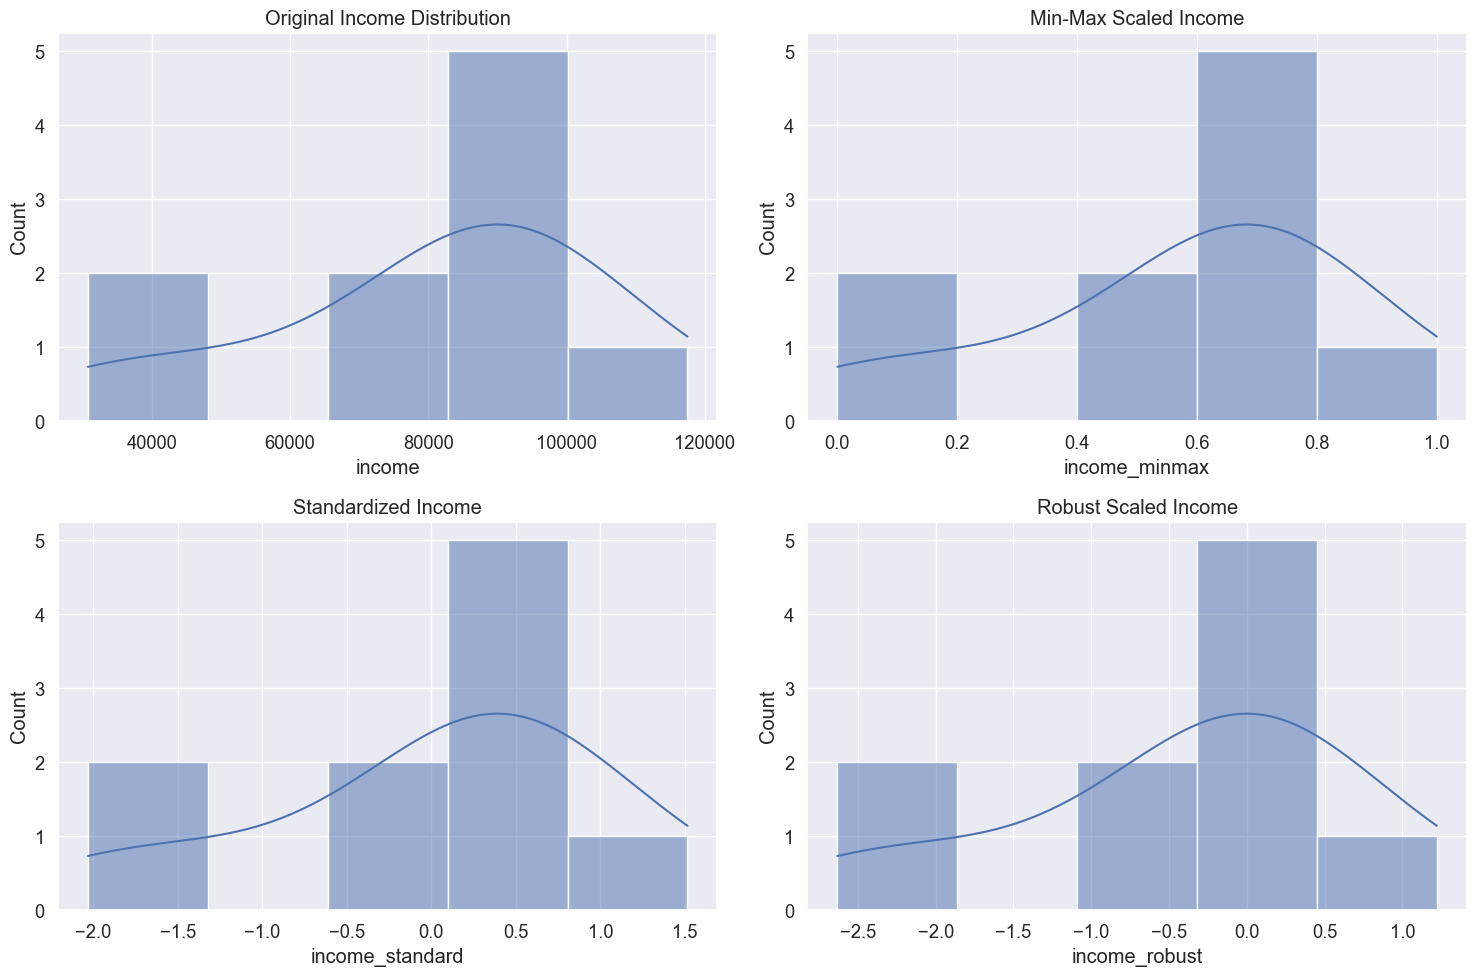

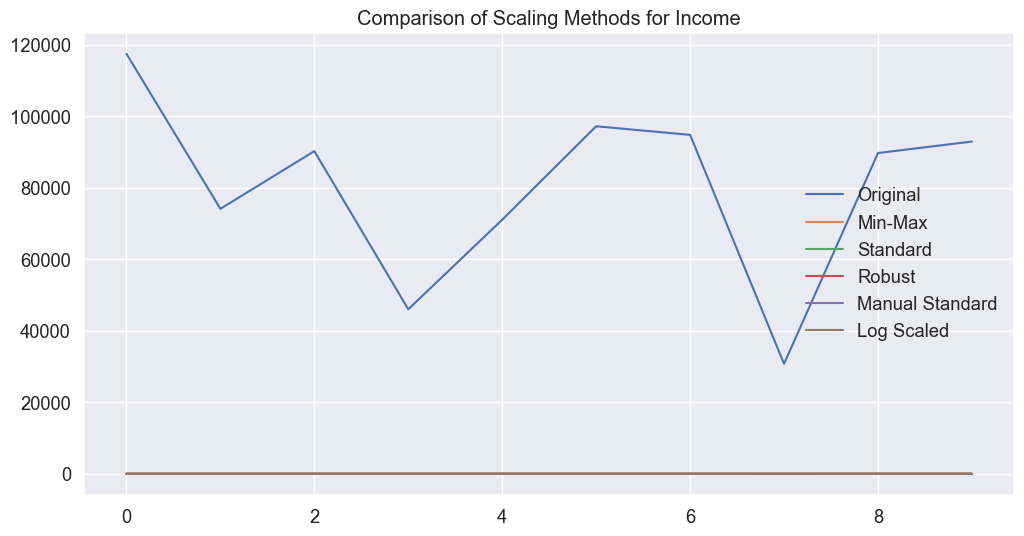

In [19]:
# Visualize the effect of different scaling methods on the income feature

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(numeric_df['income'], kde=True)
plt.title('Original Income Distribution')

plt.subplot(2, 2, 2)
sns.histplot(numeric_df_minmax['income_minmax'], kde=True)
plt.title('Min-Max Scaled Income')

plt.subplot(2, 2, 3)
sns.histplot(numeric_df_standard['income_standard'], kde=True)
plt.title('Standardized Income')

plt.subplot(2, 2, 4)
sns.histplot(numeric_df_robust['income_robust'], kde=True)
plt.title('Robust Scaled Income')

plt.tight_layout()
plt.show()

# Visualize a comparison of all scaling methods for the income feature
plt.figure(figsize=(12, 6))
plt.plot(all_scaled['income'], label='Original')
plt.plot(all_scaled['income_minmax'], label='Min-Max')
plt.plot(all_scaled['income_standard'], label='Standard')
plt.plot(all_scaled['income_robust'], label='Robust')
plt.plot(all_scaled['income_manual_standard'], label='Manual Standard')
plt.plot(all_scaled['income_log_scaled'], label='Log Scaled')
plt.title('Comparison of Scaling Methods for Income')
plt.legend()
plt.grid(True)
plt.show()

## Summary

In this notebook, we've explored a variety of data transformation techniques:

1. **Basic Data Transformations**: Adding/removing columns, renaming, changing data types
2. **Mathematical Transformations**: Log, square root, polynomial transformations
3. **String Transformations**: Text cleaning, pattern extraction, string manipulation
4. **Categorical Data Transformations**: One-hot encoding, label encoding, ordinal encoding
5. **Custom Transformations**: Using apply() and map() for complex transformations
6. **Date and Time Transformations**: Extracting components, formatting, calculating differences
7. **Scaling and Normalization**: Min-max scaling, standardization, robust scaling

These transformations are essential steps in the data preprocessing pipeline and help prepare data for analysis and modeling.